# Assignment
## Problem Statement:
Take a dataset and do the following:
* 60-20-20 split for the data.
* Train the dataset, test and validate it based on the splits.
* Compare the predicted values with the actual values and perform metrics evaluation
* Also plot AUC-ROC and find the Area under the Curve.

#### Standard imports

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

END = "\n------------------------------------\n"

#### Dataset import and feature scaling

In [66]:
df = pd.read_csv('Social_Network_Ads.csv')
sc = StandardScaler()
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x = sc.fit_transform(x)

#### Splitting the dataset for training, validation, and testing

In [67]:
x_train, xtemp, y_train, ytemp = train_test_split(x, y, test_size=0.4, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(xtemp, ytemp, test_size=0.5, random_state=0)

#### Training the model

In [68]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)


LogisticRegression(random_state=0)

#### Predicting on the validation set and test set

In [69]:
y_pred = classifier.predict(x_val)
y_final = classifier.predict(x_test)

#### Plotting confusion matrices for both

Confusion Matrix: 
[[44  5]
 [ 5 26]]
Accuracy Score: 0.875


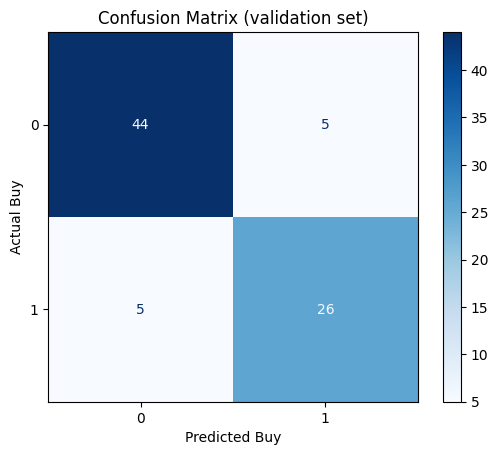

Confusion Matrix: 
[[49  3]
 [10 18]]
Accuracy Score: 0.8375


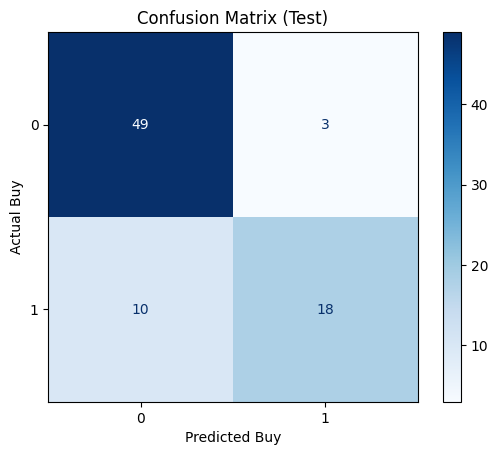

In [70]:
print(f"Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}")
print(f"Accuracy Score: {accuracy_score(y_val, y_pred)}")

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, y_pred))
disp.plot(cmap='Blues', values_format='d')
plt.xlabel('Predicted Buy')
plt.ylabel('Actual Buy')
plt.title('Confusion Matrix (validation set)')
plt.show()

# -------------------------------------

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_final)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_final)}")

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_final))
disp.plot(cmap='Blues', values_format='d')
plt.xlabel('Predicted Buy')
plt.ylabel('Actual Buy')
plt.title('Confusion Matrix (Test)')
plt.show()

#### ROC-AUC Curve

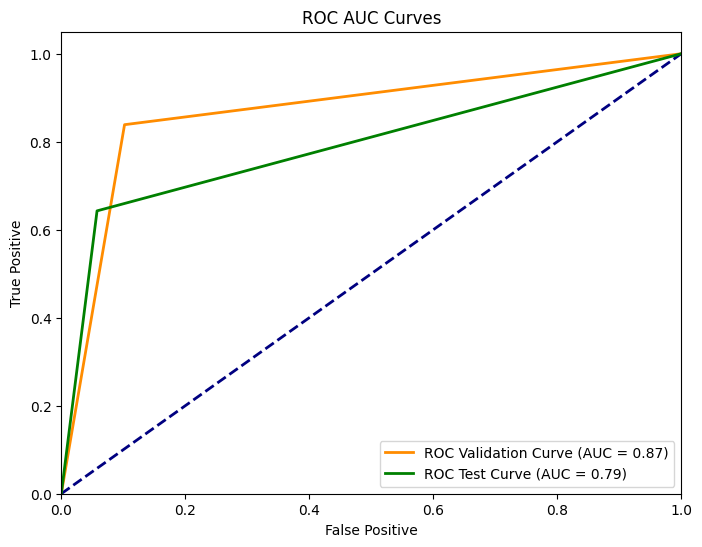

In [71]:
# ROC AUC Curve for validation and test
val_auc = round(roc_auc_score(y_val, y_pred), 2)
test_auc = round(roc_auc_score(y_test, y_final), 2)

# Plotting the ROC AUC Curve for validation set and test set
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_final)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Validation Curve (AUC = {val_auc})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'ROC Test Curve (AUC = {test_auc})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title(f'ROC AUC Curves')
plt.legend(loc='lower right')
plt.show()


#### Other Metrics

In [72]:
# Accuracy Score
print(f"Validation Accuracy Score: {round(accuracy_score(y_val, y_pred), 2)}")
print(f"Test Accuracy Score: {round(accuracy_score(y_test, y_final), 2)}", end=END)

# Precision
print(f"Validation Precision: {round(precision_score(y_val, y_pred), 2)}")
print(f"Test Precision: {round(precision_score(y_test, y_final), 2)}", end=END)

# Recall
print(f"Validation Recall: {round(recall_score(y_val, y_pred), 2)}")
print(f"Test Recall: {round(recall_score(y_test, y_final), 2)}", end=END)

# F1 Score
print(f"Validation F1 Score: {round(f1_score(y_val, y_pred), 2)}")
print(f"Test F1 Score: {round(f1_score(y_test, y_final), 2)}")


Validation Accuracy Score: 0.88
Test Accuracy Score: 0.84
------------------------------------
Validation Precision: 0.84
Test Precision: 0.86
------------------------------------
Validation Recall: 0.84
Test Recall: 0.64
------------------------------------
Validation F1 Score: 0.84
Test F1 Score: 0.73
